In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path="/content/drive/MyDrive/Research/SDC/dataset_4/m_100_size_500/run_"

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision
from matplotlib.colors import ListedColormap

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from tqdm import tqdm as tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Generate dataset

In [4]:
np.random.seed(12)
y = np.random.randint(0,10,5000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i)

0 530
1 463
2 494
3 517
4 488
5 497
6 493
7 507
8 492
9 519


In [5]:
x = np.zeros((5000,2))

In [6]:
np.random.seed(12)
x[idx[0],:] = np.random.multivariate_normal(mean = [4,6.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[0]))
x[idx[1],:] = np.random.multivariate_normal(mean = [5.5,6],cov=[[0.01,0],[0,0.01]],size=sum(idx[1]))
x[idx[2],:] = np.random.multivariate_normal(mean = [4.5,4.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[2]))
x[idx[3],:] = np.random.multivariate_normal(mean = [3,3.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[3]))
x[idx[4],:] = np.random.multivariate_normal(mean = [2.5,5.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[4]))
x[idx[5],:] = np.random.multivariate_normal(mean = [3.5,8],cov=[[0.01,0],[0,0.01]],size=sum(idx[5]))
x[idx[6],:] = np.random.multivariate_normal(mean = [5.5,8],cov=[[0.01,0],[0,0.01]],size=sum(idx[6]))
x[idx[7],:] = np.random.multivariate_normal(mean = [7,6.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[7]))
x[idx[8],:] = np.random.multivariate_normal(mean = [6.5,4.5],cov=[[0.01,0],[0,0.01]],size=sum(idx[8]))
x[idx[9],:] = np.random.multivariate_normal(mean = [5,3],cov=[[0.01,0],[0,0.01]],size=sum(idx[9]))

In [7]:
x[idx[0]][0], x[idx[2]][5] 

(array([4.04729858, 6.43185741]), array([4.46762703, 4.2460364 ]))

In [8]:
print(x.shape,y.shape)

(5000, 2) (5000,)


In [9]:
idx= []
for i in range(10):
  idx.append(y==i)

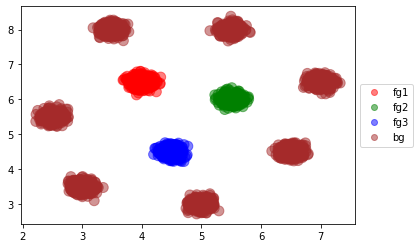

In [10]:
colors_base_data = ['red','green','blue','brown','brown','brown','brown','brown','brown','brown']
plt.figure()

scatter = plt.scatter(x[:,0],x[:,1],c=y,cmap=matplotlib.colors.ListedColormap(colors_base_data),alpha=0.5,s=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           handles=scatter.legend_elements()[0],labels=("fg1","fg2","fg3","bg"))

In [11]:
x = ( x -  np.mean(x,axis=0,keepdims=True) ) / np.std(x,axis=0,keepdims=True) 


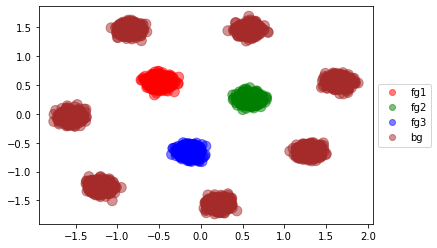

In [12]:
plt.figure()

scatter = plt.scatter(x[:,0],x[:,1],c=y,cmap=matplotlib.colors.ListedColormap(colors_base_data),alpha=0.5,s=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           handles=scatter.legend_elements()[0],labels=("fg1","fg2","fg3","bg"))

In [13]:
foreground_classes = {'class_0','class_1' }

background_classes = {'bg_classes',}

In [14]:
desired_num = 1500
mosaic_list_of_images =[]
mosaic_label = []
fore_idx=[]
m = 100
for j in tqdm(range(desired_num)):
    np.random.seed(j)
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,m)
    a = []
    for i in range(m):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_of_images.append(np.reshape(a,(m,2)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

100%|██████████████████████████████████████| 1500/1500 [00:04<00:00, 349.27it/s]


In [15]:
# mosaic_list_of_images = np.concatenate(mosaic_list_of_images,axis=1).T


In [16]:
len(mosaic_list_of_images), mosaic_list_of_images[0],mosaic_list_of_images[0].shape

(1500,
 array([[ 1.47567327e+00, -6.54288463e-01],
        [ 5.70309537e-01,  1.40548543e+00],
        [ 6.45138085e-01,  1.45552171e+00],
        [-1.49276692e+00, -1.19351958e-01],
        [ 1.29302537e+00, -6.59632751e-01],
        [ 1.69530635e+00,  5.77825956e-01],
        [ 2.33298162e-01, -1.60818073e+00],
        [-1.19634229e+00, -1.30879595e+00],
        [-8.94887062e-01,  1.45514933e+00],
        [ 2.31230274e-01, -1.53243055e+00],
        [ 1.60485457e-01, -1.54922073e+00],
        [-1.58705852e+00, -1.43409509e-02],
        [ 6.43994604e-01,  1.37759531e+00],
        [ 5.67602372e-01,  1.52378643e+00],
        [ 2.19141185e-01, -1.59850438e+00],
        [-1.13305281e+00, -1.34940200e+00],
        [-1.32318630e+00, -1.25935820e+00],
        [ 6.10206335e-01,  1.48882458e+00],
        [ 6.56593191e-01,  1.48538108e+00],
        [ 1.42863187e-01, -1.46428492e+00],
        [-1.25305585e+00, -1.31546647e+00],
        [-1.51580467e+00, -8.43213567e-02],
        [-1.19906115e+00,

In [17]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]



In [18]:
batch = 100
msd1 = MosaicDataset(mosaic_list_of_images[0:500], mosaic_label[0:500] , fore_idx[0:500])
train_loader = DataLoader( msd1 ,batch_size= batch ,shuffle=True)

In [19]:
data,_,_=iter(train_loader).next()

In [20]:
data.shape

torch.Size([100, 100, 2])

In [21]:
batch = 250
msd2 = MosaicDataset(mosaic_list_of_images[500:], mosaic_label[500:] , fore_idx[500:])
test_loader = DataLoader( msd2 ,batch_size= batch ,shuffle=True)

In [22]:
class Focus(nn.Module):
    def __init__(self):
        super(Focus, self).__init__()
        self.fc1 = nn.Linear(2,50, bias=False)
        torch.nn.init.xavier_normal_(self.fc1.weight)
        self.fc2 = nn.Linear(50, 1, bias=False)
        torch.nn.init.xavier_normal_(self.fc2.weight)

    def forward(self,z):
        #print("data",z)
        batch = z.size(0)
        patches = z.size(1)
        z = z.view(batch,patches,2*1)
        alp1,ft1 = self.helper(z)
        
  
        alpha = F.softmax(alp1,dim=1)
        y = torch.sum(alpha*ft1,dim=1)
        #print(alpha.shape,y.shape)
        alpha =alpha[:,:,0]

        return alpha,y   # return  alpha values,attended data
  
    
    def helper(self, x):
      x1 = x
      x = F.relu(self.fc1(x))
      x = self.fc2(x)

      return x,x1

In [23]:
class Classification(nn.Module):
  def __init__(self):
    super(Classification, self).__init__()
    self.fc1 = nn.Linear(2, 3)
    #self.fc2 = nn.Linear(50,3)
    torch.nn.init.xavier_normal_(self.fc1.weight)
    torch.nn.init.zeros_(self.fc1.bias)
    #torch.nn.init.xavier_normal_(self.fc2.weight)
    #torch.nn.init.zeros_(self.fc2.bias)

  def forward(self, x):
    #print(x.shape)
    #x = x.view(-1, 1)
    #print(x.shape)
    #x = F.relu(self.fc1(x))
    x = self.fc1(x)
    # print(x.shape)
    return x

In [24]:
def plot_attended_data(trainloader,fnet,cnet,base_data,base_labels,nepoch=0):
    attended_data = []
    mlabels = []
    with torch.no_grad():
        for data in train_loader:
            inputs, labels , fore_idx = data
            inputs = inputs.double()
            #inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
            alphas, avg_data = fnet(inputs)
            mlabels.append(labels.cpu().numpy())
            attended_data.append(avg_data.cpu().numpy())
    mlabels = np.concatenate(mlabels,axis=0)
    attended_data = np.concatenate(attended_data,axis=0)
    plt.figure(figsize=(6,8))
    colors = ['red','green',"blue"]
    scatter = plt.scatter(attended_data[:,0] ,attended_data[:,1],c=mlabels,
                          cmap=matplotlib.colors.ListedColormap(colors),alpha=0.8)
    plt.legend(handles=scatter.legend_elements()[0], labels=["fg0","fg1","fg2"])
    plt.title("Attended Data "+str(nepoch))
    
    X,Y = torch.meshgrid(torch.linspace(-2,2,100), torch.linspace(-2,2,100))
    n=X.shape[0]*X.shape[1]
    data = torch.zeros((n,2)).double()
    data[:,0]=X.reshape((-1,))
    data[:,1]=Y.reshape((-1,))
    #data = data.to("cuda")
    with torch.no_grad():
        Z,_ = fnet.helper(data)
    Z = Z.cpu().numpy()
    Z = Z.reshape(X.shape)
    plt.figure(figsize=(6,8))
    cax = plt.contourf(X,Y,Z,)
    scatter = plt.scatter(base_data[:,0] ,base_data[:,1],c=base_labels,
                          cmap=matplotlib.colors.ListedColormap(colors_base_data)
                          ,alpha=0.8)
    plt.legend(handles=scatter.legend_elements()[0], labels=["fg0","fg1","fg2","bg"])
    plt.colorbar(cax)
    plt.title("Focus Map "+str(nepoch))

    with torch.no_grad():
        Z1 = cnet(data)
        _, Z1 = torch.max(Z1.data, 1)
        Z1 = Z1.cpu().numpy()
        Z1 = Z1.reshape(X.shape)
    plt.figure(figsize=(6,8))
    cax = plt.contourf(X,Y,Z1)
    plt.colorbar(cax)
    scatter = plt.scatter(attended_data[:,0] ,attended_data[:,1],c=mlabels,
                          cmap=matplotlib.colors.ListedColormap(colors),alpha=0.8)
    plt.legend(handles=scatter.legend_elements()[0], labels=["fg0","fg1","fg2"])
    plt.title("classification map "+str(nepoch))

In [25]:
torch.manual_seed(14)
focus_net = Focus().double()
#focus_net = focus_net.to("cuda")

In [26]:
torch.manual_seed(14)
classify = Classification().double()
#classify = classify.to("cuda")

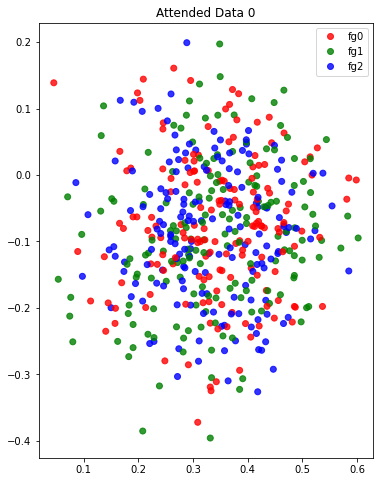

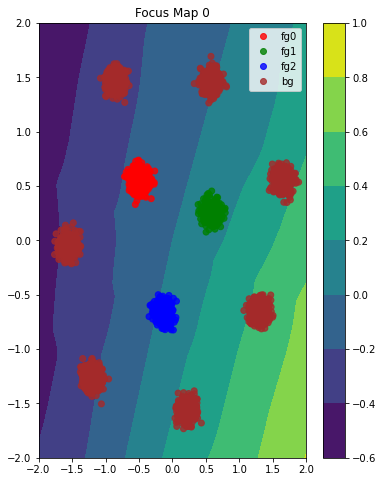

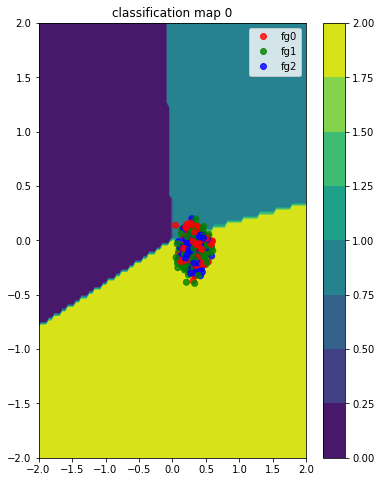

In [27]:
plot_attended_data(train_loader,focus_net,classify,x,y,0)

In [28]:
# for params in focus_net.named_parameters():
#     print(params)
#focus_net = focus_net.to("cuda")

# focus_net.fc2.weight.data = -focus_net.fc2.weight.data
# plot_attended_data(train_loader,focus_net,classify,x,y,0)

In [29]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer_classify = optim.SGD(classify.parameters(), lr=0.05 , momentum=0.9)
optimizer_focus = optim.SGD(focus_net.parameters(), lr=0.05 , momentum=0.9)

In [30]:
col1=[]
col2=[]
col3=[]
col4=[]
col5=[]
col6=[]
col7=[]
col8=[]
col9=[]
col10=[]
col11=[]
col12=[]
col13=[]

In [31]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in train_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)
    # print(outputs.shape)
    _, predicted = torch.max(outputs.data, 1)
    # print(predicted.shape)

    for j in range(labels.size(0)):
      count += 1
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      # print(focus, fore_idx[j], predicted[j])
      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %f %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %f %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %f %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %f %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %f %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half ==================> ",argmax_more_than_half)
print("argmax_less_than_half ==================> ",argmax_less_than_half)
print(count)

print("="*100)

col1.append(0)
col2.append(argmax_more_than_half)
col3.append(argmax_less_than_half)
col4.append(focus_true_pred_true)
col5.append(focus_false_pred_true)
col6.append(focus_true_pred_false)
col7.append(focus_false_pred_false)

Accuracy of the network on the train images: 34.800000 %
total correct 174
total train set images 500
focus_true_pred_true 0 =============> FTPT : 0.000000 %
focus_false_pred_true 174 =============> FFPT : 34.800000 %
focus_true_pred_false 0 =============> FTPF : 0.000000 %
focus_false_pred_false 326 =============> FFPF : 65.200000 %
argmax_more_than_half ==================>  0
argmax_less_than_half ==================>  500
500


In [32]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %f %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %f %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %f %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %f %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half ==================> ",argmax_more_than_half)
print("argmax_less_than_half ==================> ",argmax_less_than_half)
col8.append(argmax_more_than_half)
col9.append(argmax_less_than_half)
col10.append(focus_true_pred_true)
col11.append(focus_false_pred_true)
col12.append(focus_true_pred_false)
col13.append(focus_false_pred_false)

Accuracy of the network on the test images: 33.900000 %
total correct 339
total train set images 1000
focus_true_pred_true 0 =============> FTPT : 0.000000 %
focus_false_pred_true 339 =============> FFPT : 33.900000 %
focus_true_pred_false 0 =============> FTPF : 0.000000 %
focus_false_pred_false 661 =============> FFPF : 66.100000 %
argmax_more_than_half ==================>  0
argmax_less_than_half ==================>  1000


In [ ]:
nos_epochs = 1000
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0


for epoch in range(nos_epochs):  # loop over the dataset multiple times

  focus_true_pred_true =0
  focus_false_pred_true =0
  focus_true_pred_false =0
  focus_false_pred_false =0
  
  argmax_more_than_half = 0
  argmax_less_than_half =0
  
  running_loss = 0.0
  epoch_loss = []
  cnt=0

  iteration = desired_num // batch
  
  #training data set
  
  for i, data in  enumerate(train_loader):
    inputs , labels , fore_idx = data
    batch = inputs.size(0)
    #inputs, labels = inputs.to("cuda"), labels.to("cuda")
    inputs = inputs.double()
    # zero the parameter gradients
    
    optimizer_focus.zero_grad()
    optimizer_classify.zero_grad()
    
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)
#     print(outputs)
#     print(outputs.shape,labels.shape , torch.argmax(outputs, dim=1))

    loss = criterion(outputs, labels) 
    loss.backward()
    optimizer_focus.step()
    optimizer_classify.step()

    running_loss += loss.item()
    mini = 5
    if cnt % mini == mini-1:    # print every 40 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
      epoch_loss.append(running_loss/mini)
      running_loss = 0.0
    cnt=cnt+1
    
    if epoch % 1 == 0:
      for j in range (batch):
        focus = torch.argmax(alphas[j])

        if(alphas[j][focus] >= 0.5):
          argmax_more_than_half +=1
        else:
          argmax_less_than_half +=1

        if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1

        elif(focus != fore_idx[j] and predicted[j] == labels[j]):
          focus_false_pred_true +=1

        elif(focus == fore_idx[j] and predicted[j] != labels[j]):
          focus_true_pred_false +=1

        elif(focus != fore_idx[j] and predicted[j] != labels[j]):
          focus_false_pred_false +=1

  if(np.mean(epoch_loss) <= 0.001):
      break;
    
  if epoch % 20 ==0:
    plot_attended_data(train_loader,focus_net,classify,x,y,epoch+1)

  if epoch % 1 == 0:
    col1.append(epoch + 1)
    col2.append(argmax_more_than_half)
    col3.append(argmax_less_than_half)
    col4.append(focus_true_pred_true)
    col5.append(focus_false_pred_true)
    col6.append(focus_true_pred_false)
    col7.append(focus_false_pred_false)
    # print("="*20)
    # print("Train FTPT : ", col4)
    # print("Train FFPT : ", col5)
    #************************************************************************
    #testing data set  
    # focus_net.eval()
    with torch.no_grad():
      focus_true_pred_true =0
      focus_false_pred_true =0
      focus_true_pred_false =0
      focus_false_pred_false =0

      argmax_more_than_half = 0
      argmax_less_than_half =0
      for data in test_loader:
        inputs, labels , fore_idx = data
        batch = inputs.size(0)
        inputs = inputs.double()
        #inputs, labels = inputs.to("cuda"), labels.to("cuda")
        alphas, avg_images = focus_net(inputs)
        outputs = classify(avg_images)
        _, predicted = torch.max(outputs.data, 1)

        for j in range (batch):
          focus = torch.argmax(alphas[j])

          if(alphas[j][focus] >= 0.5):
            argmax_more_than_half +=1
          else:
            argmax_less_than_half +=1

          if(focus == fore_idx[j] and predicted[j] == labels[j]):
            focus_true_pred_true += 1

          elif(focus != fore_idx[j] and predicted[j] == labels[j]):
            focus_false_pred_true +=1

          elif(focus == fore_idx[j] and predicted[j] != labels[j]):
            focus_true_pred_false +=1

          elif(focus != fore_idx[j] and predicted[j] != labels[j]):
            focus_false_pred_false +=1
      
    col8.append(argmax_more_than_half)
    col9.append(argmax_less_than_half)
    col10.append(focus_true_pred_true)
    col11.append(focus_false_pred_true)
    col12.append(focus_true_pred_false)
    col13.append(focus_false_pred_false)
    # print("Test FTPT : ", col10)
    # print("Test FFPT : ", col11)
    # print("="*20)
    
print('Finished Training')

[1,     5] loss: 1.106
[2,     5] loss: 1.102
[3,     5] loss: 1.105
[4,     5] loss: 1.104
[5,     5] loss: 1.101
[6,     5] loss: 1.102
[7,     5] loss: 1.102
[8,     5] loss: 1.101
[9,     5] loss: 1.101
[10,     5] loss: 1.101
[11,     5] loss: 1.100
[12,     5] loss: 1.101
[13,     5] loss: 1.100
[14,     5] loss: 1.100
[15,     5] loss: 1.100
[16,     5] loss: 1.099
[17,     5] loss: 1.100
[18,     5] loss: 1.100
[19,     5] loss: 1.099
[20,     5] loss: 1.099
[21,     5] loss: 1.100
[22,     5] loss: 1.099
[23,     5] loss: 1.099
[24,     5] loss: 1.099
[25,     5] loss: 1.100
[26,     5] loss: 1.100
[27,     5] loss: 1.098
[28,     5] loss: 1.099
[29,     5] loss: 1.099
[30,     5] loss: 1.098
[31,     5] loss: 1.098
[32,     5] loss: 1.098
[33,     5] loss: 1.098
[34,     5] loss: 1.098
[35,     5] loss: 1.098
[36,     5] loss: 1.098
[37,     5] loss: 1.098
[38,     5] loss: 1.097
[39,     5] loss: 1.099
[40,     5] loss: 1.098
[41,     5] loss: 1.098
[42,     5] loss: 1.097
[

/var/folders/gl/27byknls1z5_v94kltf90q2h0000gn/T/ipykernel_13572/3538267679.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,8))


[122,     5] loss: 1.091
[123,     5] loss: 1.091
[124,     5] loss: 1.091
[125,     5] loss: 1.090
[126,     5] loss: 1.092
[127,     5] loss: 1.091
[128,     5] loss: 1.090
[129,     5] loss: 1.090
[130,     5] loss: 1.090
[131,     5] loss: 1.089
[132,     5] loss: 1.089
[133,     5] loss: 1.090
[134,     5] loss: 1.089
[135,     5] loss: 1.088
[136,     5] loss: 1.088
[137,     5] loss: 1.089
[138,     5] loss: 1.089
[139,     5] loss: 1.087
[140,     5] loss: 1.091
[141,     5] loss: 1.088
[142,     5] loss: 1.088
[143,     5] loss: 1.088
[144,     5] loss: 1.086
[145,     5] loss: 1.085
[146,     5] loss: 1.084
[147,     5] loss: 1.084
[148,     5] loss: 1.082
[149,     5] loss: 1.082
[150,     5] loss: 1.081
[151,     5] loss: 1.080
[152,     5] loss: 1.080
[153,     5] loss: 1.079
[154,     5] loss: 1.078
[155,     5] loss: 1.076
[156,     5] loss: 1.076
[157,     5] loss: 1.073
[158,     5] loss: 1.069
[159,     5] loss: 1.067
[160,     5] loss: 1.065
[161,     5] loss: 1.060


In [ ]:
# torch.save(focus_net.state_dict(),path+"_focus.pt")
# torch.save(classify.state_dict(),path+"_classify.pt")

In [ ]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

In [ ]:
columns = ["epochs", "argmax > 0.5" ,"argmax < 0.5", "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]

In [ ]:
df_train[columns[0]] = col1
df_train[columns[1]] = col2
df_train[columns[2]] = col3
df_train[columns[3]] = col4
df_train[columns[4]] = col5
df_train[columns[5]] = col6
df_train[columns[6]] = col7

df_test[columns[0]] = col1
df_test[columns[1]] = col8
df_test[columns[2]] = col9
df_test[columns[3]] = col10
df_test[columns[4]] = col11
df_test[columns[5]] = col12
df_test[columns[6]] = col13

In [ ]:
df_train

In [ ]:
num  = 5
plt.figure(figsize=(6,5))
plt.plot(col1,np.array(col4)/num, label ="FTPT")
plt.plot(col1,np.array(col5)/num, label ="FFPT")
plt.plot(col1,np.array(col6)/num, label ="FTPF")
plt.plot(col1,np.array(col7)/num, label ="FFPF")
plt.title("Dataset1 - SDC On Train set")
plt.grid()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.xlabel("epochs", fontsize=14, fontweight = 'bold')
plt.ylabel("percentage train data", fontsize=14, fontweight = 'bold')
# plt.savefig(path+"_train.png", bbox_inches="tight")
# plt.savefig(path+"_train.pdf", bbox_inches="tight")
# plt.savefig(path+"_train.png", bbox_inches="tight")
# plt.savefig(path+"_train.pdf", bbox_inches="tight")
plt.show()

In [ ]:
df_test

In [ ]:
num = 10
plt.figure(figsize=(6,5))
plt.plot(col1,np.array(col10)/num, label ="FTPT")
plt.plot(col1,np.array(col11)/num, label ="FFPT")
plt.plot(col1,np.array(col12)/num, label ="FTPF")
plt.plot(col1,np.array(col13)/num, label ="FFPF")
plt.title("Dataset1 - SDC On Test set")
plt.grid()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.xlabel("epochs", fontsize=14, fontweight = 'bold')
plt.ylabel("percentage test data", fontsize=14, fontweight = 'bold')
# plt.savefig(path+"_test.png", bbox_inches="tight")
# plt.savefig(path+"_test.pdf", bbox_inches="tight")
# plt.savefig(path+"_test.png", bbox_inches="tight")
# plt.savefig(path+"_test.pdf", bbox_inches="tight")
plt.show()

In [ ]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in train_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %f %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %f %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %f %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %f %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %f %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half ==================> ",argmax_more_than_half)
print("argmax_less_than_half ==================> ",argmax_less_than_half)

In [ ]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %f %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %f %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %f %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %f %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half ==================> ",argmax_more_than_half)
print("argmax_less_than_half ==================> ",argmax_less_than_half)

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in train_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels = inputs.to("cuda"), labels.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %f %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels = inputs.to("cuda"), labels.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

In [ ]:
plot_attended_data(train_loader,focus_net,classify,x,y,epoch+1)